# Creación Modelo de Machine Learning (Reg.Logística) - Curso Isaac González

## Que es este notebook?
Buenas, este notebook se ha realizado en paralelo a la realización del curso de Isaac González **Machine learning challenge** que puedes encontrar en este link [Desafío ML](https://www.datascience4business.com/optin-31694403).

Este curso es muy recomendable tanto para la gente que se está iniciando como para la gente que sepa pero no ha tocado R y quiere ver un flujo completo con R desarrollado con el IDE RStudio. A mi me ha servido tanto como para saber que diferencias hay entre R y Python, como sobretodo por añadir a mis conocimientos una pincelada de la metodología que sigue un profesional a la hora de enfrentarse a un problema de ML.

Es cierto, que por ahora, no quiero ampliar mis conocimientos en R y que con esta primera inmersión, a parte de añadir a un profesional mas del mundo del DS en mi lista de 'a seguir' he tenido suficiente.

Si que, por un tema de seguir el curso también en lenguaje Python y ver sus capacidades paralelas, pues todo los scripts que mas o menos tienen una 'traducción' a python de R, pues los he ido desarrollando en este notebook.

Os dejo por tanto, si alguien da con este link un resumen de las 3 clases de Isaac González desarrollado en python en vez de en R, por completitud. Recomendando **fervientemente** realizar su curso y seguir sus clases (aprox 3h) de puro aprendizaje.

## Objetivo del curso
Principalmente el objetivo es analizar un set de datos de una maquina que puede apagarse de forma súbita, tiene toda una serie de instrumentos acoplados a ella para hacer un seguimiento, temperatura, humedad y diferentes medidas, con dicho análisis, finalmente se realizará una modelización que permita con los datos de entrada saber si la maquina puede fallar o no, o cuál es la posibilidad de fallar.

**Los que sigáis el curso de Isaac González**: Veréis que intento evitar al máximo *'spoilers'* del curso, pero alguna cosa he de explicar para que el notebook tenga algo de sentido, veréis también que tiene algunos añadidos que he metido, mas que nada, porque ya puestos, pues aplicaba algún algoritmo de análisis más, y alguno hecho por mí (que seguro que utilizan otros) para graficar y evaluar todos los datos etc.. Evidentemente tenéis la libertad máxima para copiar y reutilizar si los consideráis útiles.

**FiSeR**

# Script de Python Paso a Paso

In [1]:
#Importamos librerías que nos servirán para realizar un análisis de los datos
#y entender tanto los datos en bruto (desde una visión técnica), como los datos 
#en su sentido funcional
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set() # Dejar bonitos los gráficos que usen la librería de matplotlib

import warnings
warnings.filterwarnings('ignore')

# Lectura del fichero y primera visualización de los datos

In [2]:
df = pd.read_csv("DataSetFallosMaquina.csv",sep=';')
df.head()

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No
3,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No
4,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No


# Análisis de los Datos

## Datos Estadísticos Básicos

In [3]:
df.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,64.026412,83.337090,1090.900387,1.489868,0.999203,1071.629895,1075.822860,1076.023793,1086.897086,1077.277209,1082.014572,1082.403005,1088.719148,1088.329349,1076.755806,1088.307377,1082.392304,217.341872
std,2.868833,4.836256,537.097769,1.115605,0.816473,536.518466,533.158826,534.004966,538.195156,537.187671,532.983115,537.582829,534.995992,533.299486,535.111353,537.264847,537.527604,151.751750
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000
25%,62.000000,80.000000,629.000000,0.000000,0.000000,608.750000,606.000000,623.000000,621.000000,612.000000,631.000000,619.000000,627.000000,627.000000,609.000000,617.000000,614.000000,90.000000
50%,64.000000,83.000000,1096.000000,1.000000,1.000000,1058.000000,1077.000000,1072.000000,1089.000000,1074.000000,1078.000000,1080.000000,1093.000000,1082.000000,1067.000000,1088.500000,1076.000000,195.000000
75%,66.000000,87.000000,1555.000000,2.000000,2.000000,1533.000000,1541.000000,1537.000000,1558.000000,1541.000000,1532.000000,1547.000000,1550.000000,1552.000000,1539.000000,1560.000000,1550.000000,324.000000
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,666.000000


Aquí que destaque, se puede ver que el mínimo de la temperatura comparando los percentiles y el máximo que hay $1$ o $n+1$ valores atípicos, esto lo confirmaremos visualmente y lo trataremos posteriormente

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Temperature                   8784 non-null   int64 
 1   Humidity                      8784 non-null   int64 
 2   Operator                      8784 non-null   object
 3   Measure1                      8784 non-null   int64 
 4   Measure2                      8784 non-null   int64 
 5   Measure3                      8784 non-null   int64 
 6   Measure4                      8784 non-null   int64 
 7   Measure5                      8784 non-null   int64 
 8   Measure6                      8784 non-null   int64 
 9   Measure7                      8784 non-null   int64 
 10  Measure8                      8784 non-null   int64 
 11  Measure9                      8784 non-null   int64 
 12  Measure10                     8784 non-null   int64 
 13  Measure11         

Miramos la distribución de las diferentes variables

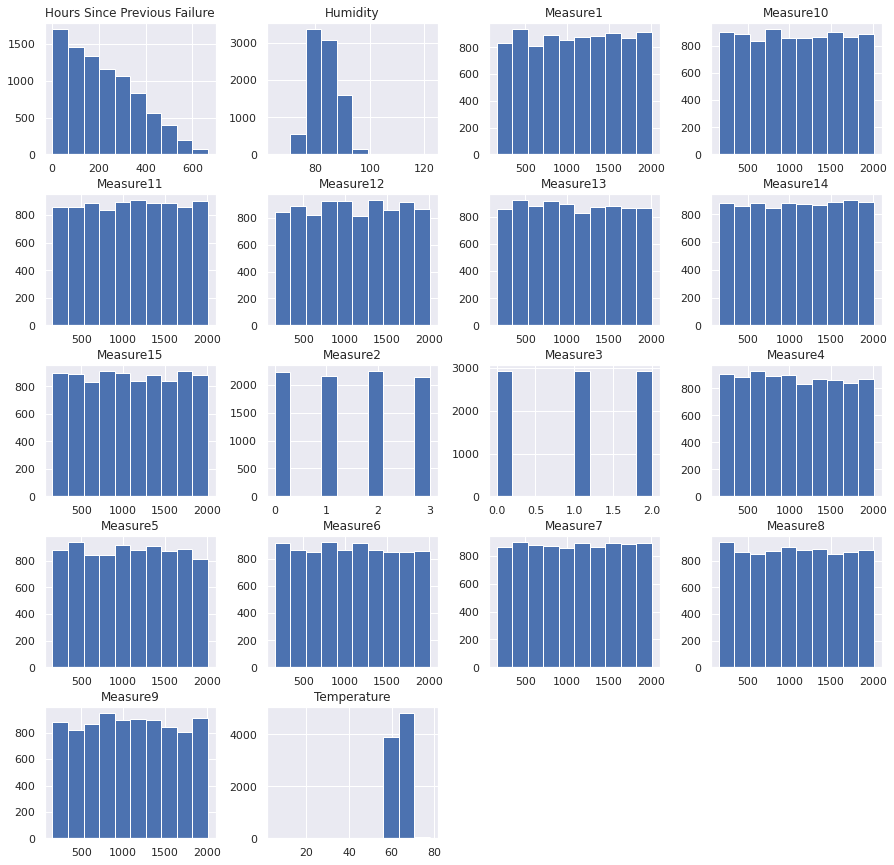

In [5]:
df.hist(figsize=(15,15))
plt.show()

Si hay variables correlacionadas las tenemos que quitar porque necesitamos variables independientes para relacionar todo el set de variables $x_n$ con la variable de salida logística $y$ que yo os imagináis que será si el dispositivo esta apagado o encendido.

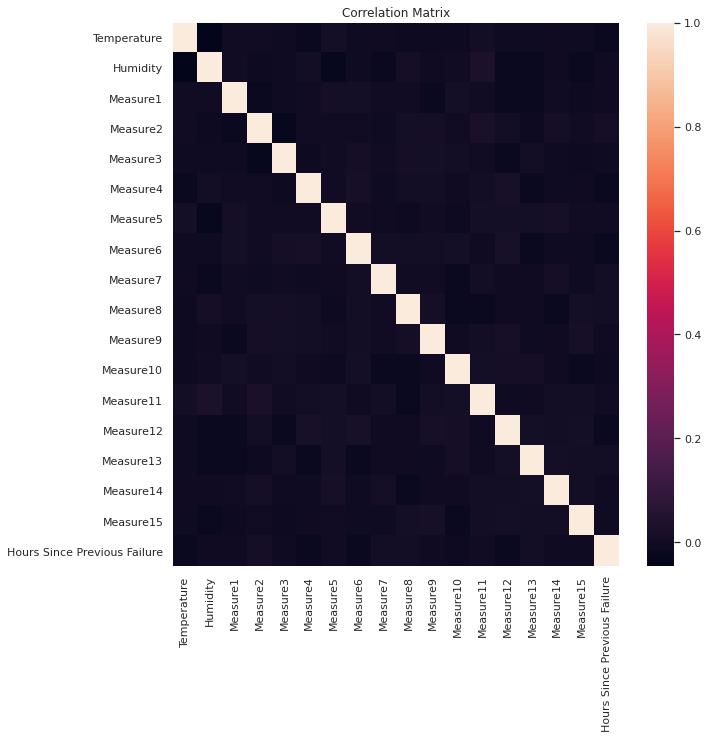

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'))
plt.title('Correlation Matrix')
plt.show()

Miramos mas elementos visuales que nos puedan llevar a entender el comportamiento de las variables, sus funciones de distribución, valores atípicos, si son o no son variables contínuas o categóricas, etc...

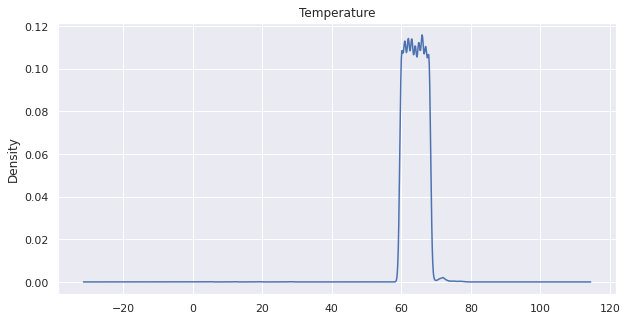

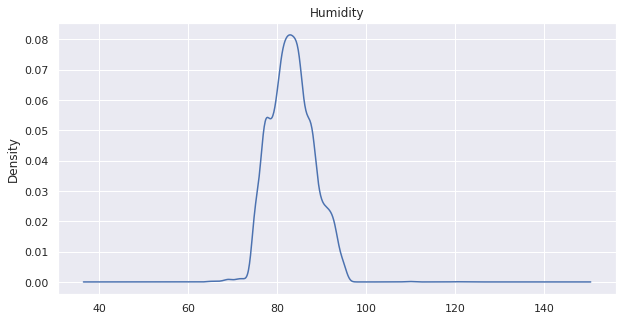

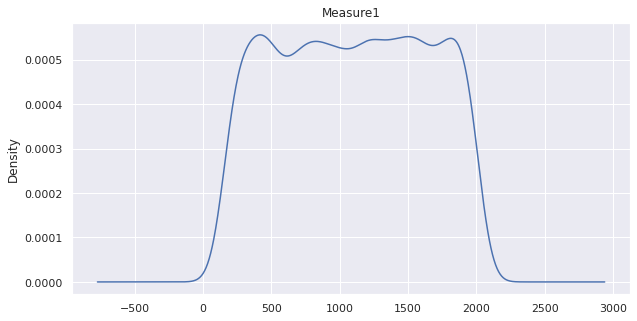

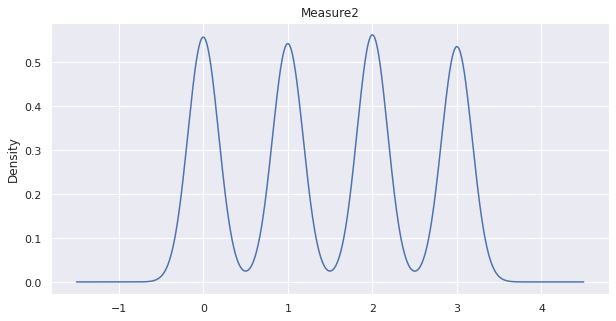

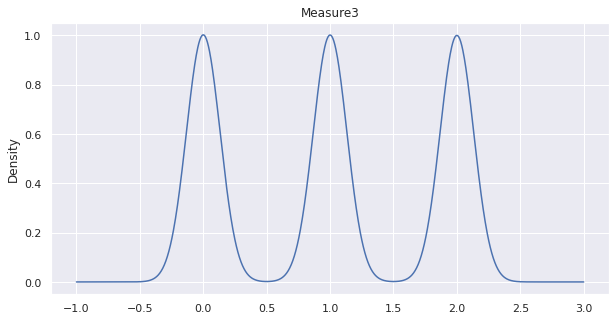

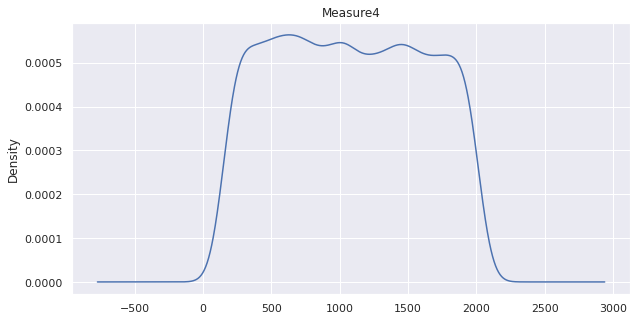

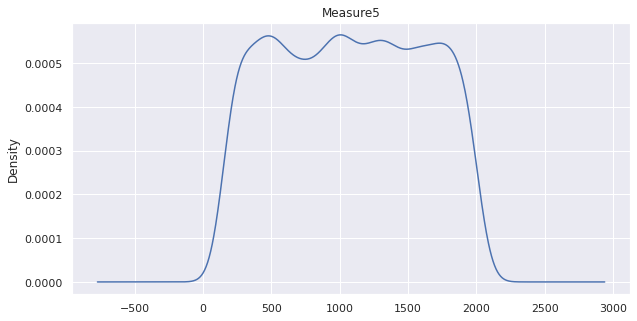

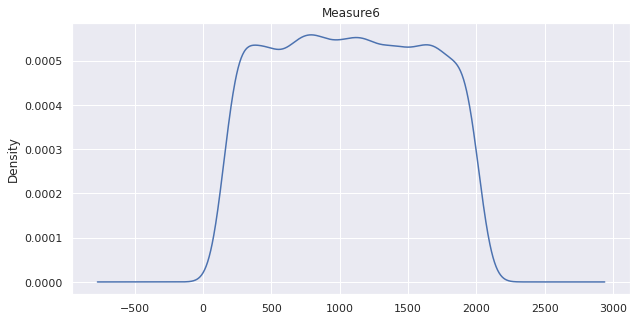

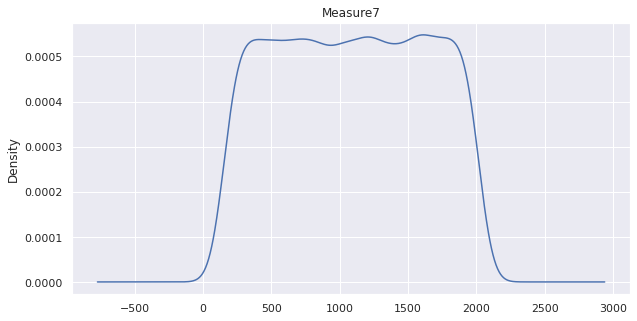

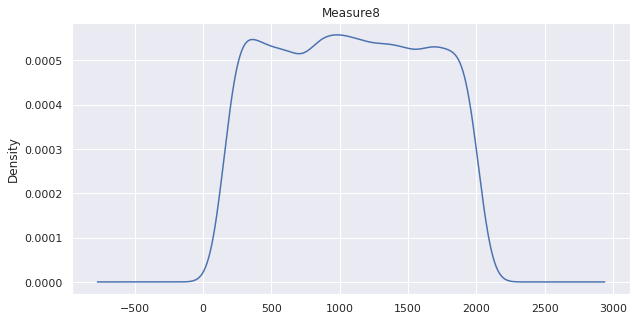

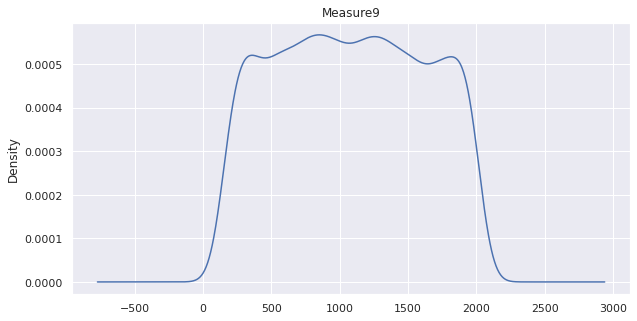

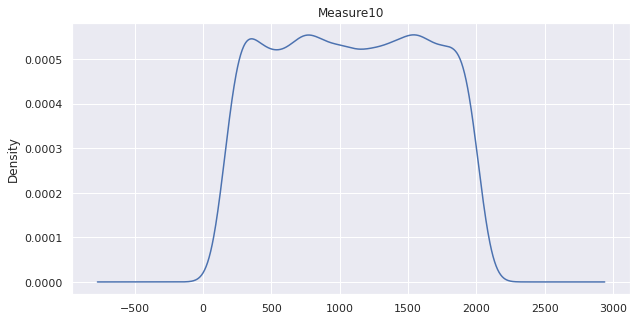

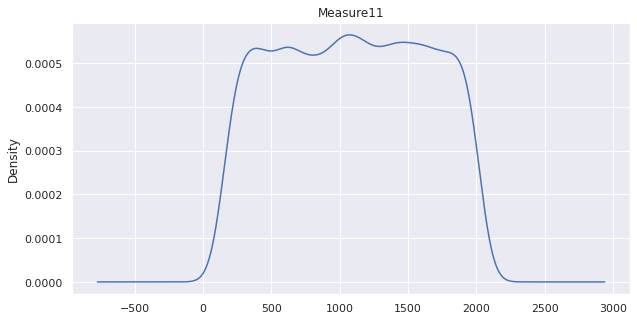

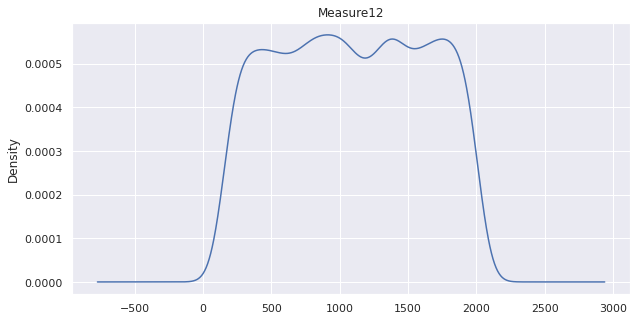

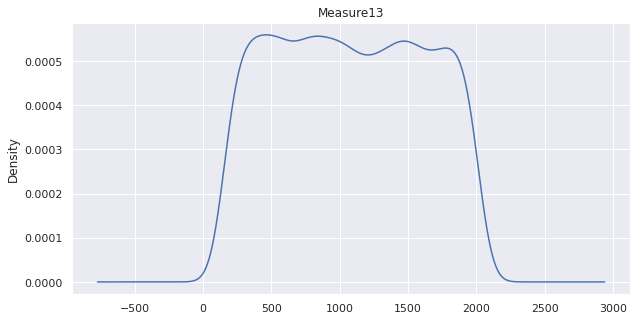

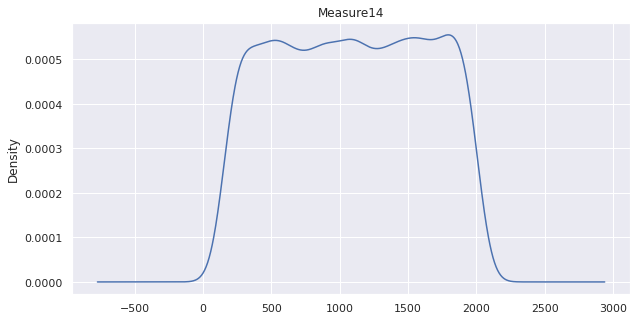

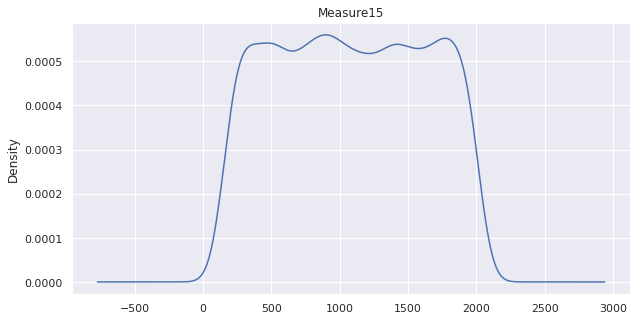

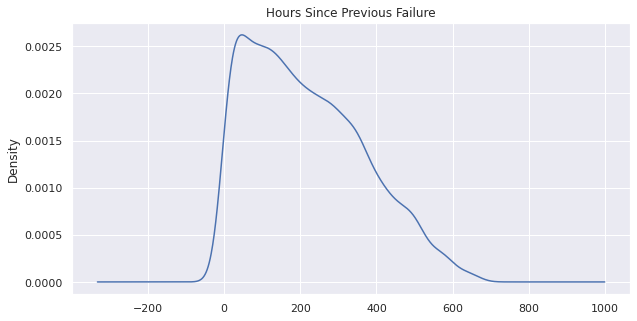

In [7]:
for col in df:
    if df[col].dtype == 'int64':
        df[col].plot(kind='kde',figsize=(10,5),title=col,grid=True)
        plt.show()

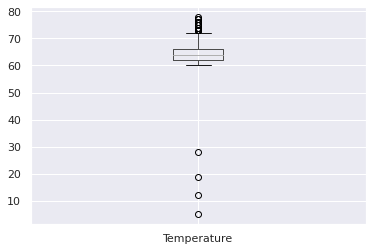

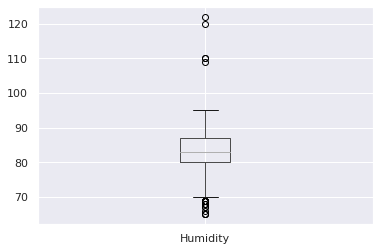

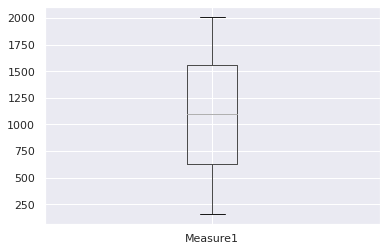

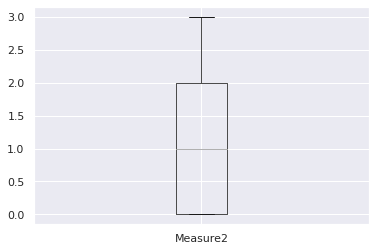

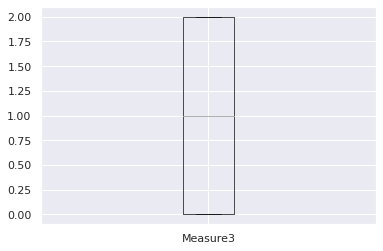

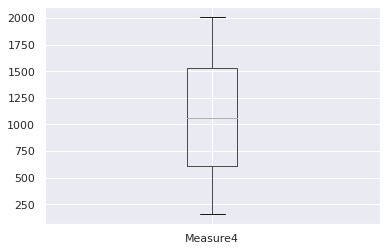

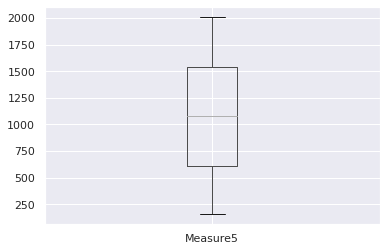

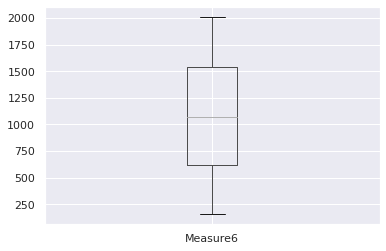

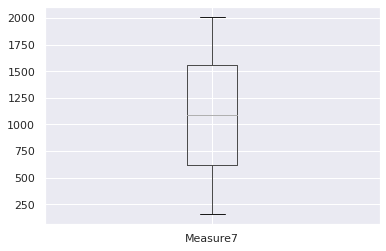

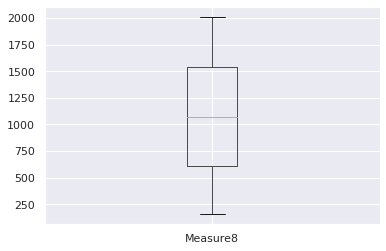

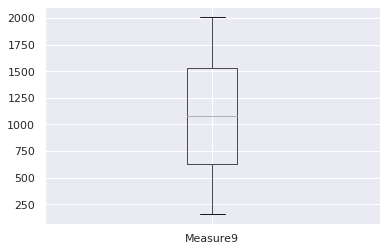

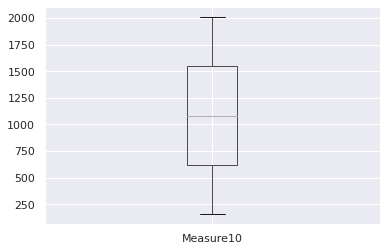

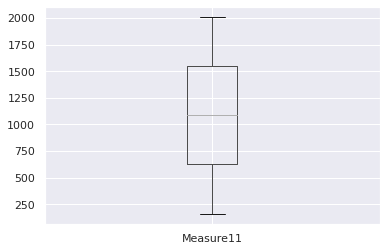

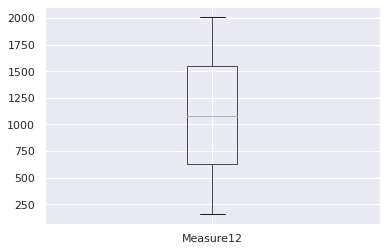

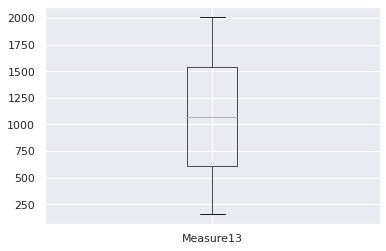

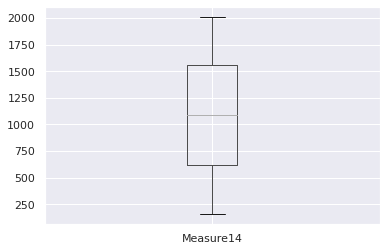

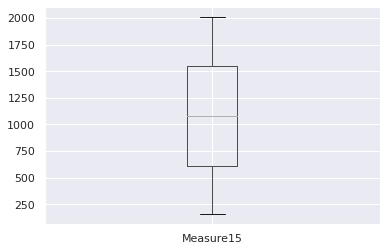

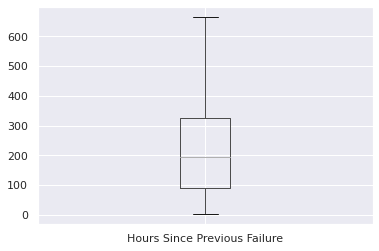

In [8]:
for col in df:
    if df[col].dtype == 'int64':
        df.boxplot(column=col)
        plt.show()

Aquí puede visualizarse lo que comentábamos al principio, la temperatura tiene valores atípicos en su parte baja. También podemos ver que algunos *Mesurements* tienen distribuciones discretas, lo que nos lleva a pensar que son realmente valores categóricos y no contínuos/numéricos y como tal serán tratados.

## Transformación de los datos

### Valores atípicos - Temperatura

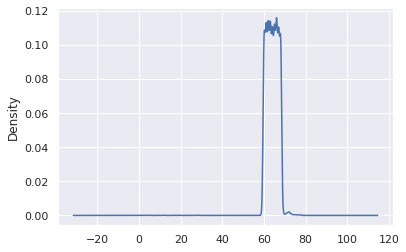

In [9]:
df.Temperature.plot(kind='kde')
plt.show()

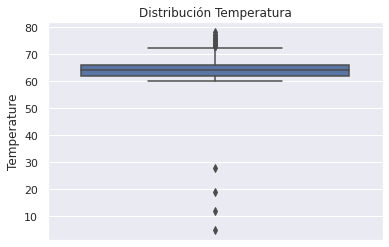

In [10]:
sns.boxplot(y='Temperature',data=df)
plt.title('Distribución Temperatura')
plt.show()

In [11]:
df = df[df.Temperature > 50]#Quitamos atípicos de temperatura

Y validamos que ahora tiene una distribución correcta

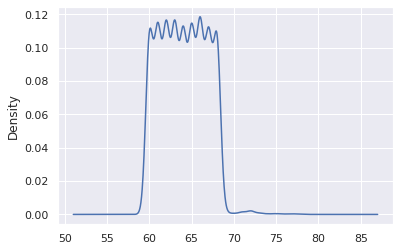

In [12]:
df.Temperature.plot(kind='kde')
plt.show()

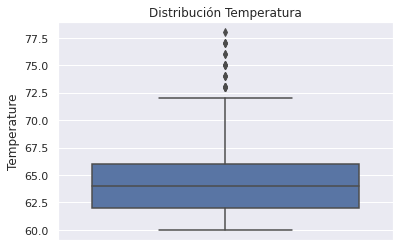

In [13]:
sns.boxplot(y='Temperature',data=df)
plt.title('Distribución Temperatura')
plt.show()

### Valores categóricos pasarlos a no continuos (no variable tipo numero)

In [14]:
df['Measure2'] = df.Measure2.astype(str)
df['Measure3'] = df.Measure3.astype(str)

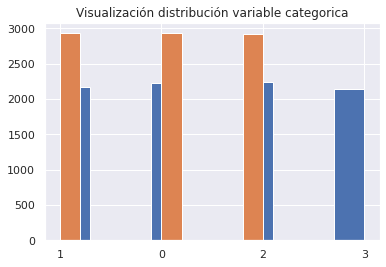

In [15]:
df.Measure2.hist()
df.Measure3.hist()
plt.title('Visualización distribución variable categorica')
plt.show()

*No está en el curso!*

Ya que tenemos variables categóricas, sacaremos los gráficos de pareto, un clásico que siempre viene bien. En este caso, no aportan mucho, a parte de confirmar lo que se ha podido ver antes, que estas medidas categóricas estan repartidas de forma muy parecida, con lo que no creo que tengan un peso muy importante en la regresión logística que se modelizará posteriormente

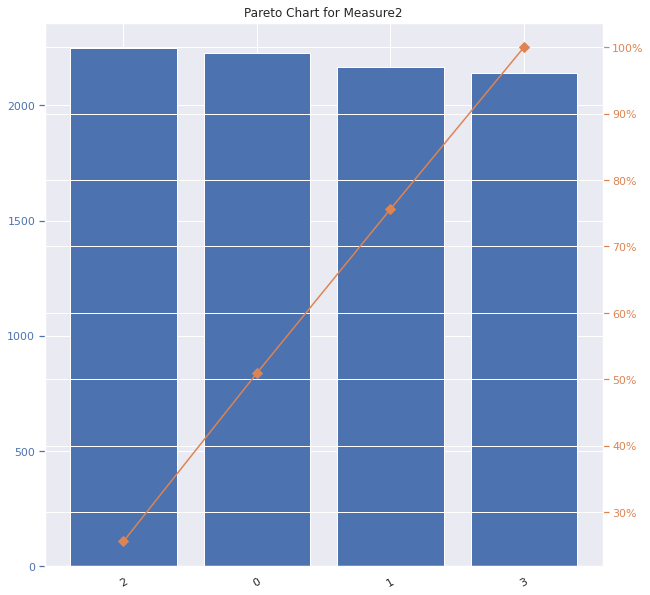

In [16]:
#Variables categóricas 2, Measure 6 y Measure 7

#Measure 2
#Montamos el set de datos
grp_value = df.groupby('Measure2')
freq = grp_value.Measure2.count()
freq = freq.sort_values(ascending=False) #Ordenamos de mas a menos (tal y como indica pareto)

#Y el porcentaje acumulado
perc = freq.cumsum()/freq.sum()*100

#Graficamos

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(freq.index, freq, color="C0")
ax2 = ax.twinx()
ax2.plot(freq.index, perc, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.title('Pareto Chart for Measure2')

ax.tick_params(axis='x',labelrotation=30)
plt.show() 

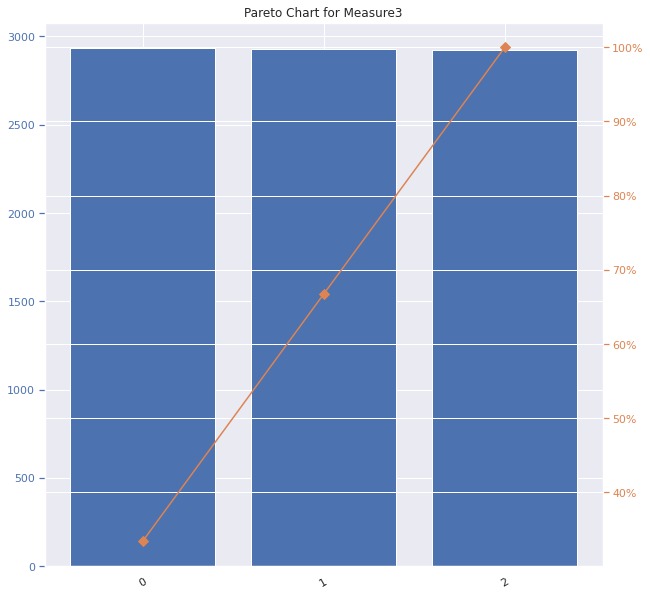

In [17]:
#Measure 3
#Montamos el set de datos
grp_value = df.groupby('Measure3')
freq = grp_value.Measure3.count()
freq = freq.sort_values(ascending=False) #Ordenamos de mas a menos (tal y como indica pareto)

#Y el porcentaje acumulado
perc = freq.cumsum()/freq.sum()*100

#Graficamos

fig, ax = plt.subplots(figsize=(10,10))

ax.bar(freq.index, freq, color="C0")
ax2 = ax.twinx()
ax2.plot(freq.index, perc, color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

ax.tick_params(axis='x',labelrotation=30)
plt.title('Pareto Chart for Measure3')
plt.show()   

### Balanceo de Datos / Penetración

In [18]:
print('Yes = ','{:.2%}'.format(df['Failure'][df.Failure=='Yes'].count() / df.Failure.count()))
print('No = ','{:.2%}'.format(df['Failure'][df.Failure=='No'].count() / df.Failure.count()))

Yes =  0.92%
No =  99.08%


In [19]:
df_no = df[df.Failure=='No'].sample(frac=0.08,random_state=1234)
df_si = df[df.Failure=='Yes']

In [20]:
df_res = df_no + df_si

In [21]:
df_res = df_no.append(df_si)

In [22]:
print('Yes = ','{:.2%}'.format(df_res['Failure'][df.Failure=='Yes'].count() / df_res.Failure.count()))
print('No = ','{:.2%}'.format(df_res['Failure'][df.Failure=='No'].count() / df_res.Failure.count()))

Yes =  10.42%
No =  89.58%


In [23]:
#BACKUP AND CONTINUE - Esto es una costumbre mía, guardarme el dataframe bruto, transformado, etc..
df_backup = df
df = df_res

*No está en el curso*
### Segregamos los valores categóricos en columnas diferenciadas (nuevas variables)
Podríamos borrar las variables categóricas, pero podemos tenerlas en cuenta en el modelo, segregandolas en columnas con $1$ o $0$.

In [24]:
#Operators
df_Operators = pd.get_dummies(df.Operator)
df.drop('Operator',axis=1,inplace=True)

In [25]:
#Measure 2
df_ms2 = pd.get_dummies(df.Measure2)
for col in df_ms2:
    new_name = 'Measure2_'+ str(col)
    df_ms2.rename(index=str,columns={col: new_name},inplace=True)
df.drop('Measure2',axis=1,inplace=True)

#Measure 3
df_ms3 = pd.get_dummies(df.Measure3)
for col in df_ms3:
    new_name = 'Measure3_'+ str(col)
    df_ms3.rename(index=str,columns={col: new_name},inplace=True)
df.drop('Measure3',axis=1,inplace=True)

In [26]:
#Concatenate
df.reset_index(drop=True, inplace=True) #reseteamos indices para que la concatenación sea exitosa (técnico)
df_Operators.reset_index(drop=True, inplace=True)
df_ms2.reset_index(drop=True, inplace=True)
df_ms3.reset_index(drop=True, inplace=True)
df_con = pd.concat([df,df_Operators,df_ms2,df_ms3],axis=1)
df = df_con
df.head()

,Temperature,Humidity,Measure1,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,...,Operator6,Operator7,Operator8,Measure2_0,Measure2_1,Measure2_2,Measure2_3,Measure3_0,Measure3_1,Measure3_2
0,60,80,1949,199,1749,529,1767,674,1976,1654,...,0,0,0,1,0,0,0,1,0,0
1,64,75,1864,836,987,480,485,1267,1905,888,...,0,0,0,0,0,0,1,1,0,0
2,67,83,1132,184,832,1583,1609,1097,720,1513,...,0,0,0,0,0,1,0,0,1,0
3,66,83,695,370,986,1977,1519,1609,639,1558,...,0,0,1,0,1,0,0,0,0,1
4,64,87,1089,378,220,1934,1881,996,1069,415,...,0,0,0,0,1,0,0,1,0,0


## Train Data

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [28]:
X = df.drop('Failure',axis=1)
Y = df['Failure']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3) #Size separa 70% train y 30% test (aprox)

### Creamos el Modelo

In [29]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Generamos las predicciones

In [30]:
predictions = logmodel.predict(X_test)

### Evaluamos el modelo

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99       213
         Yes       0.90      0.86      0.88        21

    accuracy                           0.98       234
   macro avg       0.94      0.92      0.93       234
weighted avg       0.98      0.98      0.98       234



[[211   2]
 [  3  18]]


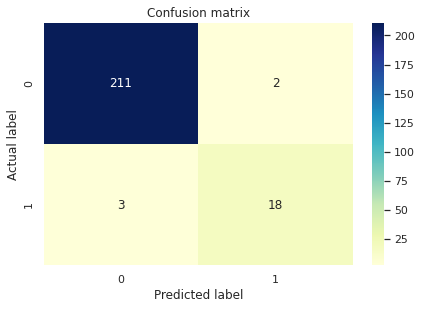

In [32]:
conf_matr = confusion_matrix(y_test,predictions)
print(conf_matr)
sns.heatmap(conf_matr,annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
print('Accuracy = ','{:.2%}'.format(accuracy_score(y_test,predictions)))

Accuracy =  97.86%
